<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/04_2_Stochastic_Grdiant_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/0.15/modules/scaling_strategies.html
https://res.cloudinary.com/dyd911kmh/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf

손실함수:
$$c(H(x), y) = -log(H(x)) : y = 1 (양성 클래스)$$
$$c(H(x), y) = -log(1-H(x)) : y = 0 (음성 클래스)$$
$$Cost(W) = \frac{1}{m}\sum-ylog(H(x))-(1-y)log(1-H(x))$$
손실함수종류

<ipython-input-15-2cf4c37447a1>:9: RuntimeWarning: divide by zero encountered in log10
  positive_predic.append(np.log10(n) * -1)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50696 (\N{HANGUL

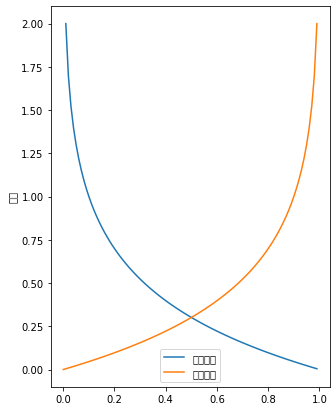

In [15]:
import numpy as np
import matplotlib.pyplot as plt

predic = np.arange(0, 1, 0.01)
positive_predic = []
negative_predic = []

for n in predic:
  positive_predic.append(np.log10(n) * -1)
  negative_predic.append(np.log10(1 - n) * -1)

plt.figure(figsize=(5,7))
plt.plot(predic, positive_predic, label='양의예측')
plt.plot(predic, negative_predic, label='음의예측')
plt.ylabel('손실')
plt.legend(loc='best')
plt.show()

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
cols = fish.columns[1:]
fish_input = fish[cols].to_numpy()
fish_target = fish['Species'].to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [3]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [4]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [5]:
import numpy as np

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))



조기종료

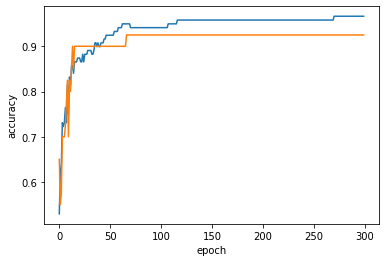

In [6]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
